# Importo Datos

In [1]:
!dir

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 58CE-83A3

 Directorio de C:\Users\Usuario\Desktop\Ucema_Quant

16/11/2020  19:18    <DIR>          .
16/11/2020  19:18    <DIR>          ..
16/11/2020  19:18    <DIR>          .ipynb_checkpoints
16/11/2020  18:56           832.190 clase1_estrategia.ipynb
15/11/2020  11:51         1.445.368 clase2_portafolio.ipynb
16/11/2020  16:25         1.789.556 clase3_data.ipynb
15/11/2020  11:51    <DIR>          data
15/11/2020  09:41    <DIR>          imagenes
16/11/2020  19:18            11.288 resumen.ipynb
15/11/2020  10:28               520 _keys.py
16/11/2020  16:24               502 __keys.py
               6 archivos      4.079.424 bytes
               5 dirs  836.301.500.416 bytes libres


In [32]:
# !pip install yfinance

import yfinance as yf
import pandas as pd

In [33]:
df = yf.download('SPY', auto_adjust=True)

df['pctChange'] = df.Close.pct_change() *100
df['sigma_250'] = df.pctChange.rolling(250).std() * 250**0.5
df['cruce_volumen'] = df.Volume / df.Volume.rolling(20).mean()
df = df.dropna()
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,pctChange,sigma_250,cruce_volumen
Date,,,,,,,,
1994-01-25,28.731264,28.750279,28.655206,28.712250,310400,0.000000,8.940710,0.958513
1994-01-26,28.712241,28.807314,28.674211,28.788300,145100,0.264869,8.918182,0.456641
1994-01-27,28.845342,29.092534,28.807313,29.054504,344500,0.924698,8.960501,1.063321
1994-01-28,29.168595,29.225639,29.130566,29.130566,356500,0.261788,8.905090,1.093005
1994-01-31,29.244665,29.396783,29.206636,29.339739,313800,0.718054,8.922966,1.068037
...,...,...,...,...,...,...,...,...
2020-11-10,353.489990,355.179993,350.510010,354.040009,85552000,-0.146658,33.305627,0.994183
2020-11-11,356.399994,357.559998,355.059998,356.670013,58649000,0.742855,33.312085,0.681275
2020-11-12,355.579987,356.720001,351.260010,353.209991,67546200,-0.970091,33.322626,0.781364


# Construyo indicadores

In [34]:
data = df.copy()

bins_sigmas = [0,10,15,20,25,30]
labels = ['Muy Bajo','Bajo','Medio','Alto','Muy Alto']
data['reg_sigma'] = pd.cut(data.sigma_250, bins=bins_sigmas, labels=labels).shift()

bins_volumen = [0, 0.5, 0.75, 1, 1.25, 1.5]
data['reg_volumen'] = pd.cut(data.cruce_volumen, bins=bins_volumen, labels=labels).shift()

data['cruce_50_200'] = data.Close.rolling(50).mean()/data.Close.rolling(200).mean().shift()
data['cruce_rapido'] = data.Close.rolling(15).mean()/data.Close.rolling(60).mean().shift()

In [35]:
data.groupby('reg_sigma').size()

reg_sigma
Muy Bajo     787
Bajo        2484
Medio       1540
Alto        1249
Muy Alto     257
dtype: int64

In [36]:
data.groupby('reg_volumen').size()

reg_volumen
Muy Bajo     293
Bajo        1293
Medio       2237
Alto        1567
Muy Alto     694
dtype: int64

In [37]:
data.groupby(['reg_sigma','reg_volumen']).size().to_frame().reset_index()

,reg_sigma,reg_volumen,0
0,Muy Bajo,Muy Bajo,99
1,Muy Bajo,Bajo,151
2,Muy Bajo,Medio,203
3,Muy Bajo,Alto,150
4,Muy Bajo,Muy Alto,75
5,Bajo,Muy Bajo,106
6,Bajo,Bajo,483
7,Bajo,Medio,782
8,Bajo,Alto,591
9,Bajo,Muy Alto,254


# Analizo Datos

In [38]:
# conda install pandas-profiling
# conda install -c conda-forge/label/cf202003 pandas-profiling

import pandas_profiling as ppf

In [39]:
data

,Open,High,Low,Close,Volume,pctChange,sigma_250,cruce_volumen,reg_sigma,reg_volumen,cruce_50_200,cruce_rapido
Date,,,,,,,,,,,,
1994-01-25,28.731264,28.750279,28.655206,28.712250,310400,0.000000,8.940710,0.958513,NaN,NaN,NaN,NaN
1994-01-26,28.712241,28.807314,28.674211,28.788300,145100,0.264869,8.918182,0.456641,Muy Bajo,Medio,NaN,NaN
1994-01-27,28.845342,29.092534,28.807313,29.054504,344500,0.924698,8.960501,1.063321,Muy Bajo,Muy Bajo,NaN,NaN
1994-01-28,29.168595,29.225639,29.130566,29.130566,356500,0.261788,8.905090,1.093005,Muy Bajo,Alto,NaN,NaN
1994-01-31,29.244665,29.396783,29.206636,29.339739,313800,0.718054,8.922966,1.068037,Muy Bajo,Alto,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-10,353.489990,355.179993,350.510010,354.040009,85552000,-0.146658,33.305627,0.994183,NaN,NaN,1.091220,1.004159
2020-11-11,356.399994,357.559998,355.059998,356.670013,58649000,0.742855,33.312085,0.681275,NaN,Medio,1.091015,1.006034
2020-11-12,355.579987,356.720001,351.260010,353.209991,67546200,-0.970091,33.322626,0.781364,NaN,Bajo,1.090210,1.006764


In [14]:
%%time
ppf.ProfileReport(data)

Wall time: 31.5 s


# Corrijo muestra

In [20]:
data = df.copy()

bins_sigmas = [0,10,15,20,25,30,1000]
labels = ['Muy Bajo','Bajo','Medio','Alto','Muy Alto','Outlier']
data['reg_sigma'] = pd.cut(data.sigma_250, bins=bins_sigmas, labels=labels).shift()

bins_volumen = [0, 0.5, 0.75, 1, 1.25, 1.5,1000]
data['reg_volumen'] = pd.cut(data.cruce_volumen, bins=bins_volumen, labels=labels).shift()

data['cruce_50_200'] = data.Close.rolling(50).mean()/data.Close.rolling(200).mean().shift()
data['cruce_15_60'] = data.Close.ewm(span=15).mean()/data.Close.ewm(span=60).mean().shift()
data.drop(['Open','High','Low'], axis=1, inplace=True)
data = data.dropna()
data

,Close,Volume,pctChange,sigma_250,cruce_volumen,reg_sigma,reg_volumen,cruce_50_200,cruce_15_60
Date,,,,,,,,,
1994-11-09,29.071299,318500,0.166867,9.953163,1.286453,Muy Bajo,Muy Alto,1.019756,1.006963
1994-11-10,28.867928,172100,-0.699560,9.978447,0.967071,Muy Bajo,Muy Alto,1.019346,1.006193
1994-11-11,28.761398,302200,-0.369023,9.975080,1.595312,Muy Bajo,Medio,1.018978,1.005258
1994-11-14,29.032557,181400,0.942785,10.003640,0.983811,Muy Bajo,Outlier,1.018958,1.005729
1994-11-15,28.935709,316900,-0.333583,10.005698,1.636669,Bajo,Medio,1.018827,1.005412
...,...,...,...,...,...,...,...,...,...
2020-11-10,354.040009,85552000,-0.146658,33.305627,0.994183,Outlier,Outlier,1.091220,1.020700
2020-11-11,356.670013,58649000,0.742855,33.312085,0.681275,Outlier,Medio,1.091015,1.023802
2020-11-12,353.209991,67546200,-0.970091,33.322626,0.781364,Outlier,Bajo,1.090210,1.024807


In [10]:
ppf.ProfileReport(data)

# Construccion de "Sintéticos"

In [21]:
data.groupby(['reg_sigma']).size()

reg_sigma
Muy Bajo     588
Bajo        2484
Medio       1540
Alto        1249
Muy Alto     257
Outlier      434
dtype: int64

In [22]:
data.groupby(['reg_volumen']).size()

reg_volumen
Muy Bajo     232
Bajo        1249
Medio       2209
Alto        1549
Muy Alto     681
Outlier      632
dtype: int64

In [23]:
import numpy as np

data = data.dropna()
frisk = 0.005 # ya esta en % es un 0.00005 sobre la unidad, equivale a 1.25% anual

sigmas_low = ['Muy Bajo','Bajo']
volumen_high = ['Medio','Alto','Muy Alto','Outlier']

sinteticos = pd.DataFrame(index=data.index)
sinteticos['BuyHold'] = data.pctChange
sinteticos['cruce_50_200'] = np.where(data.cruce_50_200 > 1, data.pctChange, frisk)
sinteticos['cruce_15_60'] = np.where(data.cruce_15_60 > 1, data.pctChange, frisk)
sinteticos['lowSigma'] = np.where(np.isin(data.reg_sigma, sigmas_low), data.pctChange, frisk)
sinteticos['highVolume'] = np.where(np.isin(data.reg_volumen, volumen_high), data.pctChange, frisk)

w = {'BuyHold':0, 'cruce_50_200':0.25, 'cruce_15_60':0.25, 'lowSigma':0.25, 'highVolume':0.25}
weights = np.array(list(w.values()))    

sinteticos['composicion_final'] = np.dot(sinteticos, weights)

<AxesSubplot:xlabel='Date'>

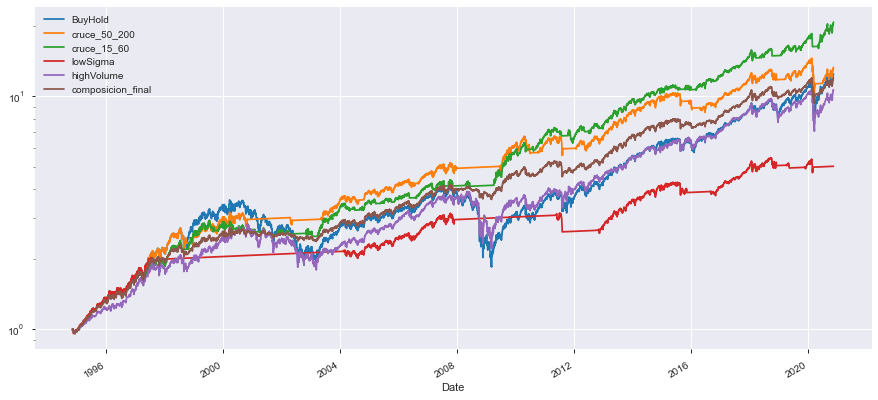

In [24]:
sinteticos_px = (sinteticos/100+1).cumprod()
sinteticos_px.plot(logy=True, figsize=(15,7))

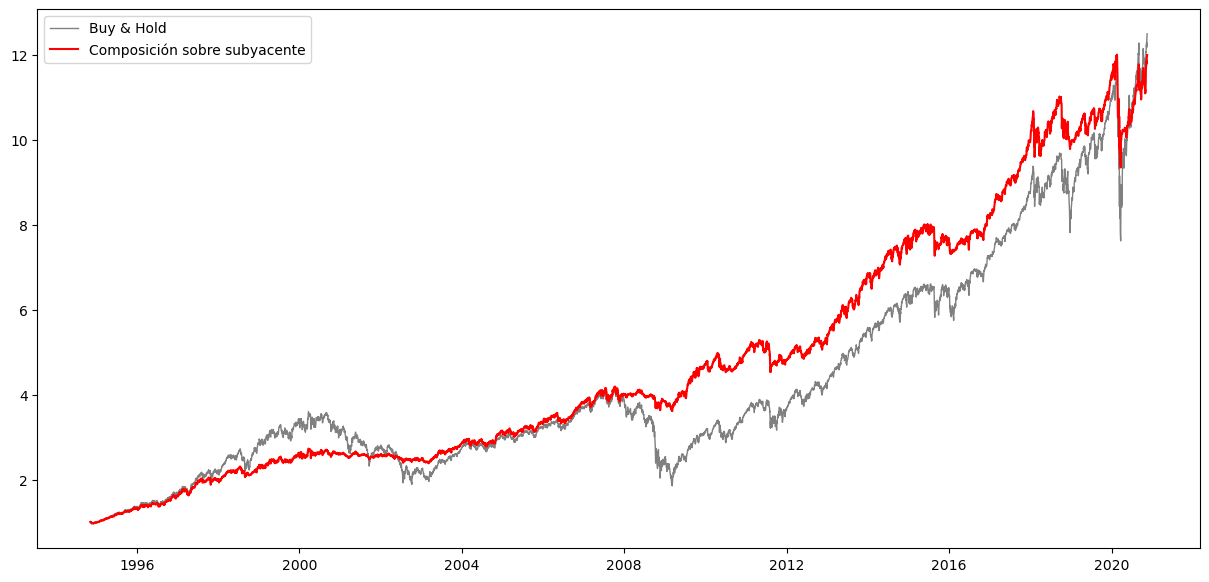

In [25]:
import matplotlib.pyplot as plt

plt.style.use('default')
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(sinteticos_px.BuyHold, lw=1, c='gray', label = 'Buy & Hold')
ax.plot(sinteticos_px.composicion_final, c='r', label = 'Composición sobre subyacente')
ax.legend()

# Análisis de métricas

In [27]:
# !pip install QuantStats
import quantstats as qs
qs.extend_pandas()

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               1994-11-09  1994-11-09
End Period                 2020-11-13  2020-11-13
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          1,089.89%   1,131.80%
CAGR%                      9.98%       10.13%
Sharpe                     0.93        0.6
Sortino                    1.31        0.84
Max Drawdown               -22.13%     -55.19%
Longest DD Days            1295        2404
Volatility (ann.)          10.89%      19.39%
R^2                        0.74        0.74
Calmar                     0.45        0.18
Skew                       -0.55       -0.05
Kurtosis                   6.01        11.58

Expected Daily %           0.04%       0.04%
Expected Monthly %         0.79%       0.81%
Expected Yearly %          9.61%       9.75%
Kelly Criterion            10.4%       7.22%
Risk of Ruin               0.0%

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-20,2020-03-23,2020-11-13,267,-22.130322,-19.560737
2,2011-05-02,2011-08-08,2012-09-13,500,-14.261428,-11.976477
3,2007-10-10,2009-03-09,2009-07-23,652,-13.751703,-13.010559
4,2000-03-27,2003-03-11,2003-10-13,1295,-12.708257,-11.938589
5,2018-09-21,2018-12-24,2019-11-15,420,-11.232227,-10.188642


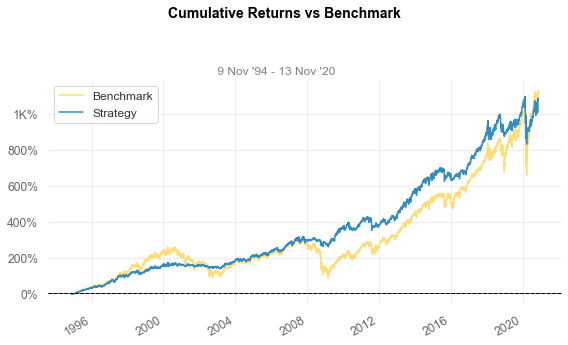

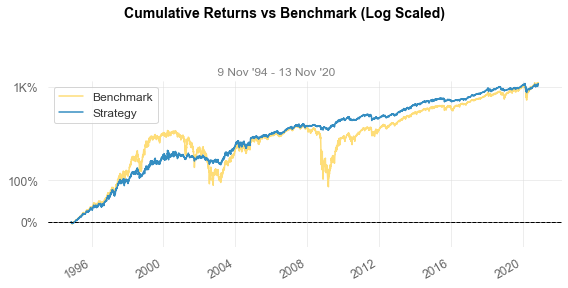

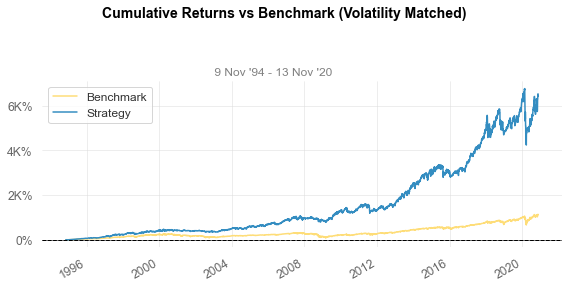

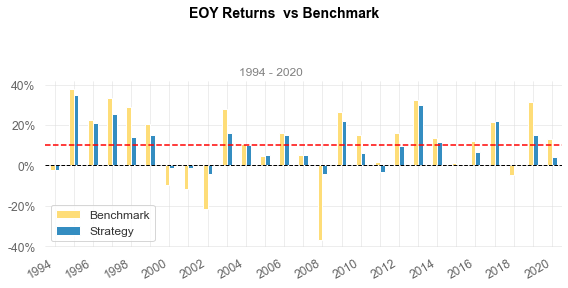

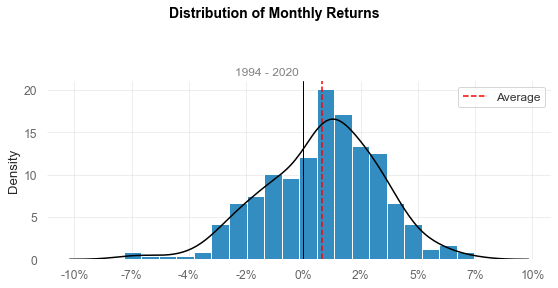

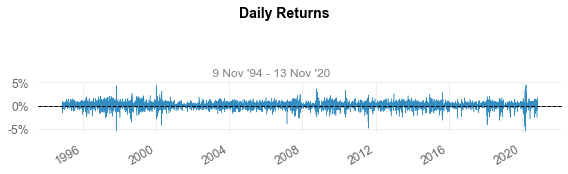

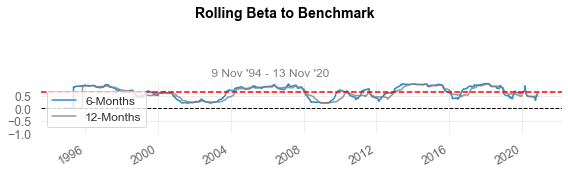

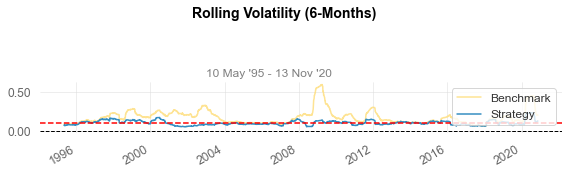

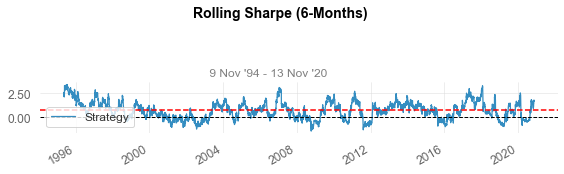

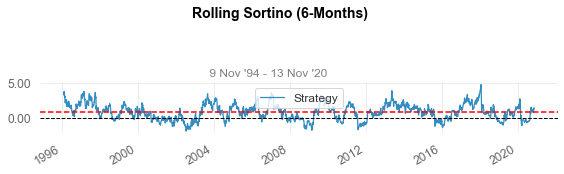

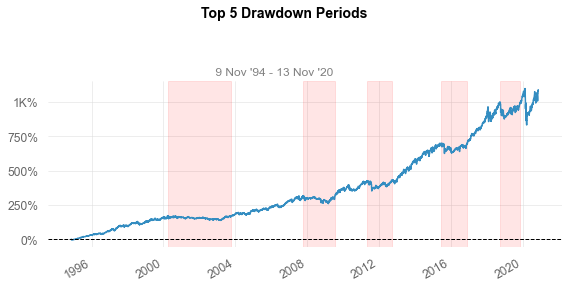

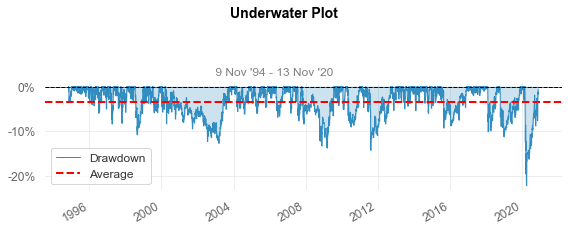

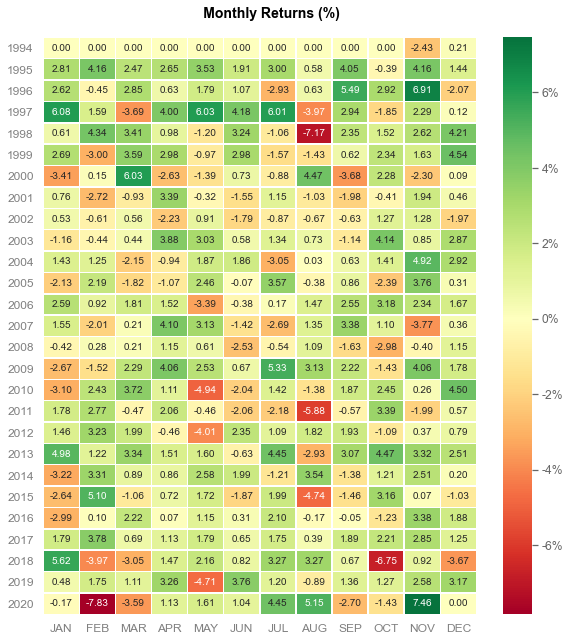

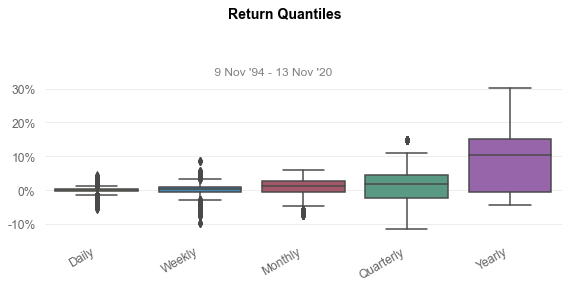

In [17]:
qs.reports.full(sinteticos_px.composicion_final, sinteticos_px.BuyHold)